In [0]:
import numpy as np
from keras.preprocessing import image
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils

In [0]:
batch_size = 128
epochs = 10
number_classes = 10

In [5]:
(x_train,y_train), (x_test,y_test)  = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


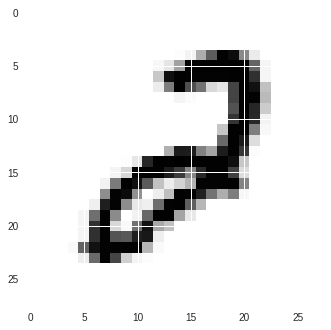

2


In [6]:
plt.imshow(x_train[555].reshape(28,28))
plt.show()
print(y_train[555])

In [7]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))
print(x_train.shape,x_test.shape)
y_train = to_categorical(y_train,number_classes)
y_test = to_categorical(y_test,number_classes)
print(y_train.shape,y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


In [0]:
datagen = image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest',
    zoom_range=0.2
)

In [9]:
temp_x = np.copy(x_train)
temp_y = np.copy(y_train)
datagen.fit(temp_x)
for i in range(2):
  data_iter = datagen.flow(temp_x, temp_y, batch_size=60000)
  x_batch, y_batch = data_iter.next()
  x_train = np.concatenate([x_train,x_batch[:50000]])
  y_train = np.concatenate([y_train,y_batch[:50000]])
  x_test = np.concatenate([x_test,x_batch[50000:]])
  y_test = np.concatenate([y_test,y_batch[50000:]])
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(160000, 28, 28, 1) (160000, 10)
(30000, 28, 28, 1) (30000, 10)


In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(160000, 28, 28, 1) (160000, 10)
(30000, 28, 28, 1) (30000, 10)


In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='valid', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [0]:
#损失函数用分类交叉熵
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)

Train on 144000 samples, validate on 16000 samples
Epoch 1/10
144000/144000 [==============================] - 17s 120us/step - loss: 0.4055 - acc: 0.8718 - val_loss: 0.2281 - val_acc: 0.9289
Epoch 2/10
144000/144000 [==============================] - 13s 94us/step - loss: 0.1502 - acc: 0.9524 - val_loss: 0.1233 - val_acc: 0.9620
Epoch 3/10
144000/144000 [==============================] - 13s 94us/step - loss: 0.1127 - acc: 0.9644 - val_loss: 0.1010 - val_acc: 0.9694
Epoch 4/10
144000/144000 [==============================] - 13s 93us/step - loss: 0.0927 - acc: 0.9711 - val_loss: 0.0859 - val_acc: 0.9731
Epoch 5/10
144000/144000 [==============================] - 13s 93us/step - loss: 0.0813 - acc: 0.9745 - val_loss: 0.0829 - val_acc: 0.9746
Epoch 6/10
144000/144000 [==============================] - 13s 92us/step - loss: 0.0733 - acc: 0.9775 - val_loss: 0.0765 - val_acc: 0.9779
Epoch 7/10
144000/144000 [==============================] - 13s 93us/step - loss: 0.0698 - acc: 0.9784 - val

In [0]:
answer = model.evaluate(x_test, y_test, verbose=0)

In [15]:
print(answer)

[0.046592597465744866, 0.9863666666666666]


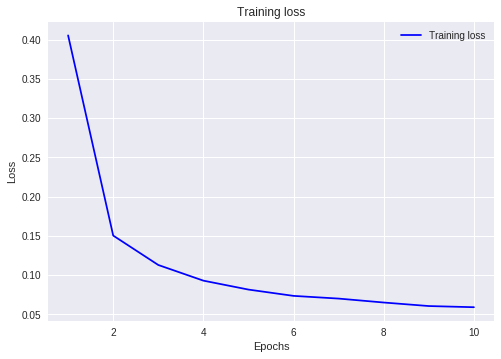

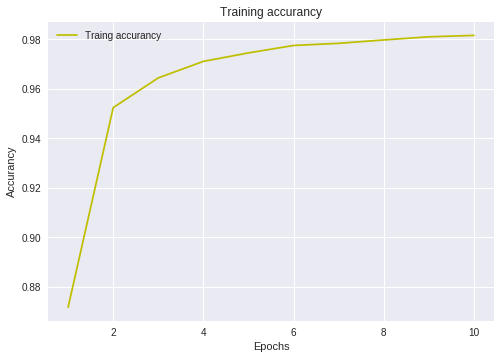

In [16]:
history_dict = history.history 
loss_values = history_dict['loss']  
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'b', label='Training loss')   
plt.title('Training loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()
plt.clf()
acc = history_dict['acc']
plt.plot(epochs, acc, 'y', label='Traing accurancy')  
plt.title('Training accurancy')
plt.xlabel('Epochs') 
plt.ylabel('Accurancy') 
plt.legend() 
plt.show()

In [17]:
!pip install tensorflowjs

    100% |████████████████████████████████| 307kB 24.3MB/s 
    100% |████████████████████████████████| 61kB 22.9MB/s 
    100% |████████████████████████████████| 13.9MB 3.2MB/s 
    100% |████████████████████████████████| 51kB 18.3MB/s 
tensorflow 1.12.0 has requirement keras-applications>=1.0.6, but you'll have keras-applications 1.0.4 which is incompatible.
tensorflow 1.12.0 has requirement keras-preprocessing>=1.0.5, but you'll have keras-preprocessing 1.0.2 which is incompatible.
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.0 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
  Found existing installation: Keras-Applications 1.0.6
    Uninstalling Keras-Applications

In [0]:


model.save('keras.h5')



In [19]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

Using TensorFlow backend.


In [20]:


!zip -r model.zip model



  adding: model/ (stored 0%)
  adding: model/model.json (deflated 82%)
  adding: model/group1-shard1of1 (deflated 7%)
